# Data Analysis Project
## Fast Food Restaurant in the US

## Table of Contents



In [1]:
import numpy as np
import pandas as pd
import string
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from math import sin, cos, sqrt, atan2, radians

url='https://raw.githubusercontent.com/ventdata/Fast-Food/master/fast-food-restaurants/Datafiniti_Fast_Food_Restaurants.csv'
data = pd.read_csv(url,sep=",")

In [2]:
data.head()

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
1,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
2,AVwcopQoByjofQCxgfVa,2016-03-29T05:06:36Z,2018-06-26T02:59:52Z,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,us/tn/pigeonforge/206wearsvalleyrd/-864103396,35.803788,-83.580553,Taco Bell,37863,TN,https://www.yellowpages.com/pigeon-forge-tn/mi...,"http://www.tacobell.com,https://locations.taco..."
3,AVweXN5RByjofQCxxilK,2017-01-03T07:46:11Z,2018-06-26T02:59:51Z,3652 Parkway,Fast Food,Pigeon Forge,US,us/tn/pigeonforge/3652parkway/93075755,35.782339,-83.551408,Arby's,37863,TN,http://www.yellowbook.com/profile/arbys_163389...,"http://www.arbys.com,https://locations.arbys.c..."
4,AWQ6MUvo3-Khe5l_j3SG,2018-06-26T02:59:43Z,2018-06-26T02:59:43Z,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,us/ga/morrow/2118mtzionparkway/1305117222,33.562738,-84.321143,Steak 'n Shake,30260,GA,https://foursquare.com/v/steak-n-shake/4bcf77a...,http://www.steaknshake.com/locations/23851-ste...


In [3]:
#Plot HISTOGRAM

cityplt = data.city.value_counts()[:10].plot.bar(title="Top 10 cities with most fastfood"
            ,color=['red','orange','gold','yellow','green','blue','cyan','orchid','khaki','black'])
cityplt.set_xlabel("city", size=15)
cityplt.set_ylabel("count", size=15)

Text(0, 0.5, 'count')

Text(0, 0.5, 'count')

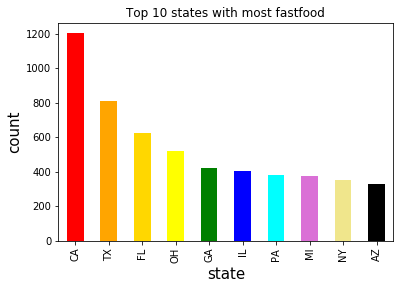

In [4]:
stateplt = data.province.value_counts()[:10].plot.bar(title="Top 10 states with most fastfood"
            ,color=['red','orange','gold','yellow','green','blue','cyan','orchid','khaki','black'])
stateplt.set_xlabel("state", size=15)
stateplt.set_ylabel("count", size=15)

In [5]:
#Arby's

arbys = data.loc[(data.name == "Arby's")]
no_arbys = len(arbys)
print("Total Arby's is %d" %no_arbys)
arbys_by_city = arbys.groupby("city").size().sort_values(ascending=False)
arbys_by_state = arbys.groupby("province").size().sort_values(ascending=False)

Total Arby's is 663


In [6]:
#Wendy's

wendys = data.loc[data.name == "Wendy's"]
no_wendys = len(wendys)
print("Total number of Wendy's is %d" %no_wendys)
wendys_by_city = wendys.groupby("city").size().sort_values(ascending=False)
wendys_by_state = wendys.groupby("province").size().sort_values(ascending=False)

Total number of Wendy's is 628


In [7]:
data["text"] = data["name"] + "," + data["province"] + "," + data["country"]

scl = [ [0, "rgb(5,10,172)"], [0.35, "rgb(40,60,190)"], [0.5, "rgb(70,100,245)"], 
       [0.6, "rgb(90,120,245)"], [0.7, "rgb(106,137, 247)"], [1, "rgb(220,220,220)"] ]

_data = [ dict(
        type = "scattergeo",
        locationmode = "USA-states",
        lon = data["longitude"],
        lat = data["latitude"],
        text = data["text"],
        mode = "markers",
        marker = dict(
            size = 4,
            opacity = 0.5,
            reversescale = True,
            autocolorscale = False,
            symbol = "circle",
            line = dict(
                width = .5,
                color = "rgba(102,102,102)"
            )))]

layout = dict(
        title = "Restaurants in the US",
        colorbar = True,
        geo = dict(
            scope = "usa",
            projection = dict(type = "albers usa"),
            showland = True,
            landcolor = "rgb(250,250,250)",
            subunitcolor = "rgb(217,217,217)",
            countrycolor = "rgb(217,217,217)",
            countrywidth = .5,
            subunitwidth = .5
        ),
    )

fig = dict(data = _data, layout = layout)
iplot(fig, validate=False, filename = "all restaurants")

In [8]:
arbys_lon = arbys.longitude
arbys_lat = arbys.latitude
arbys_city = arbys.city

arbys_data = [ dict(
        type = "scattergeo",
        locationmode = "USA-states",
        lon = arbys_lon,
        lat = arbys_lat,
        mode = "markers",
        marker = dict(
            size = 4,
            opacity = 0.5,
            reversescale = True,
            autocolorscale = False,
            symbol = "circle",
            line = dict(
                width = .5,
                color = "rgba(102,102,102)"
            )))]

arbys_layout = dict(
        title = "Arby's Restaurants in the US",
        colorbar = True,
        geo = dict(
            scope = "usa",
            projection = dict(type = "albers usa"),
            showland = True,
            landcolor = "rgb(250,250,250)",
            subunitcolor = "rgb(217,217,217)",
            countrycolor = "rgb(217,217,217)",
            countrywidth = .5,
            subunitwidth = .5
        ),
    )

fig = dict(data = arbys_data, layout = arbys_layout)
iplot(fig, validate=False, filename = "arbys restaurants")

In [9]:
wendys_lon = wendys.longitude
wendys_lat = wendys.latitude
wendys_city = wendys.city

wendys_data = [ dict(
        type = "scattergeo",
        locationmode = "USA-states",
        lon = wendys_lon,
        lat = wendys_lat,
        mode = "markers",
        marker = dict(
            size = 4,
            opacity = 0.5,
            reversescale = True,
            autocolorscale = False,
            symbol = "circle",
            line = dict(
                width = .5,
                color = "rgba(102,102,102)"
            )))]

wendys_layout = dict(
        title = "Wendy's Restaurants in the US",
        colorbar = True,
        geo = dict(
            scope = "usa",
            projection = dict(type = "albers usa"),
            showland = True,
            landcolor = "rgb(250,250,250)",
            subunitcolor = "rgb(217,217,217)",
            countrycolor = "rgb(217,217,217)",
            countrywidth = .5,
            subunitwidth = .5
        ),
    )

fig = dict(data = wendys_data, layout = wendys_layout)
iplot(fig, validate=False, filename = "arbys restaurants")

In [10]:
list_wendys_lat = [lat for lat in wendys_lat]
list_wendys_lon = [lon for lon in wendys_lon]

lat1 = radians(list_wendys_lat[0])
lon1 = radians(list_wendys_lon[0])

lat2 = radians(list_wendys_lat[1])
lon2 = radians(list_wendys_lon[1])

dlon = lon2 - lon1
dlat = lat2 - lat1

a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))

distance = R * c

print(distance)
print(len(list_wendys_lat))

def calc_distance(lat_list, lon_list):
    shortest = 0
    longest = 0
    R = 6373.0
    
    for i in range(len(lat_list)-1):
#     for i in range(0,120):
        lat1 = radians(lat_list[i])
        lon1 = radians(lon_list[i])

        lat2 = radians(lat_list[i+1])
        lon2 = radians(lon_list[i+1])
        
        dlon = lon2 - lon1
        dlat = lat2 - lat1

        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))

        distance = R * c
        
        if shortest == 0 or distance < shortest:
            shortest = distance
        else: next
            
        print(shortest)
            
    return shortest

calc_distance(list_wendys_lat, list_wendys_lon)

NameError: name 'R' is not defined